In [11]:
!pip install pyodbc

import pyodbc
import pandas as pd

conn = pyodbc.connect(
    'Driver={ODBC Driver 17 for SQL Server};'
    'Server=DAMAGED\\SQLEXPRESS;'
    'DATABASE=banking_case;'
    'Trusted_Connection=yes;'
)

In [25]:
query = "select * from customer"
df = pd.read_sql(query, conn)
conn.close()

C:\Users\ankan\AppData\Local\Temp\ipykernel_13060\1424025429.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


ProgrammingError: Attempt to use a closed connection.

In [27]:
df.head(5)

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1.485829e+06,6.036179e+05,607332.437500,12249.959961,1.134475e+06,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,6.414828e+05,2.295214e+05,344635.156250,61162.308594,2.000526e+06,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1.033402e+06,6.526747e+05,203054.343750,79071.781250,5.481376e+05,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1.048158e+06,1.048158e+06,234685.015625,57513.648438,1.148402e+06,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,4.877825e+05,4.466442e+05,128351.453125,30012.140625,1.674412e+06,0,3,1,2,5


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
df.shape

(3000, 25)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  Amount_of_Credit_Cards    3000 non-null   int64  
 13  Credit_Card_Balance       3000 non-null   float64
 14  Bank_Loa

In [39]:
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034184,25531.599685,1.463667,3176.206944,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529998,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808180,16259.950768,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924033,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480469,1482.030029,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.597656,12513.774902,1.000000,1236.630005,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542236,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.476562,22357.355469,1.000000,2560.804932,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190430,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.300781,35464.741211,2.000000,4522.632690,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.391602,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.250000,75963.898438,3.000000,13991.990234,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.867188,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [49]:
bins = [0,100000,300000, float('inf')]
labels = ['Low', 'Mid', 'High']

df['Income Band'] = pd.cut(df['Estimated_Income'], bins=bins, labels=labels, right=False)


<Axes: xlabel='Income Band'>

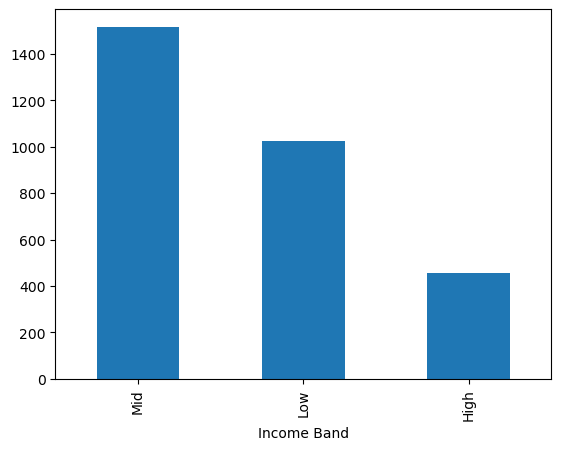

In [67]:
df['Income Band'].value_counts().plot(kind = 'bar')

In [73]:
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount_of_Credit_Cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income Band"]]

for col in categorical_cols:
    print(f"value counts for '{col}':")
    display(df[col].value_counts())

value counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

value counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

value counts for 'IAId':


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

value counts for 'Amount_of_Credit_Cards':


Amount_of_Credit_Cards
1    1922
2     765
3     313
Name: count, dtype: int64

value counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

value counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

value counts for 'Fee_Structure':


Fee_Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

value counts for 'Loyalty_Classification':


Loyalty_Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

value counts for 'Properties_Owned':


Properties_Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

value counts for 'Risk_Weighting':


Risk_Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

value counts for 'Income Band':


Income Band
Mid     1517
Low     1027
High     456
Name: count, dtype: int64

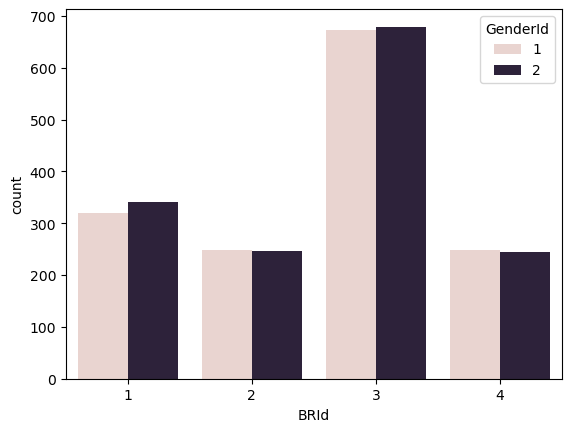

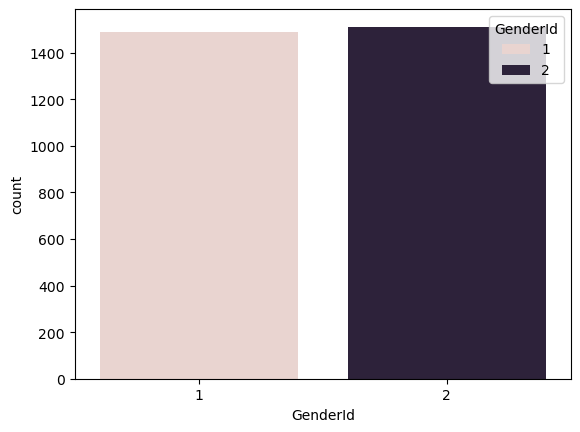

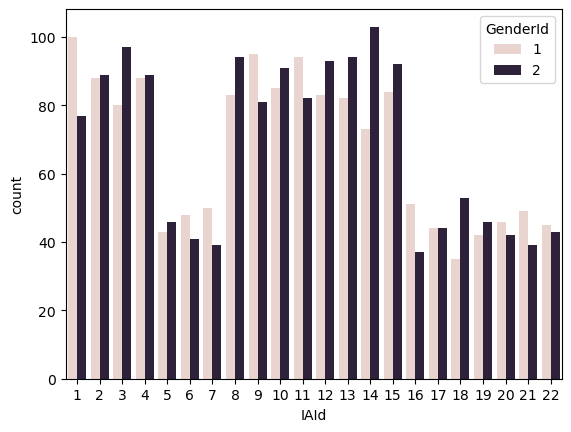

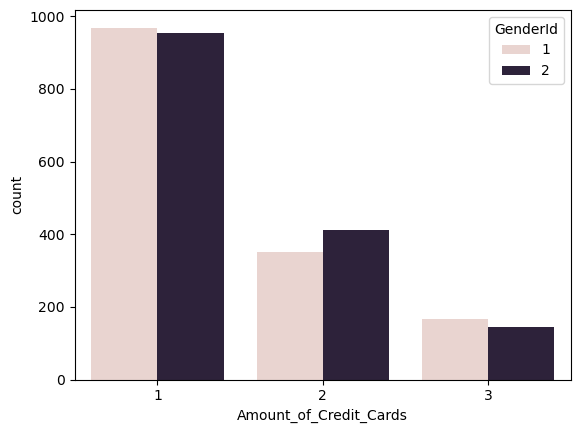

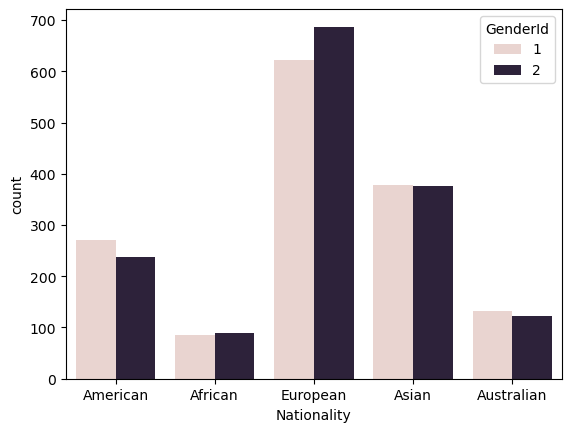

C:\Users\ankan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


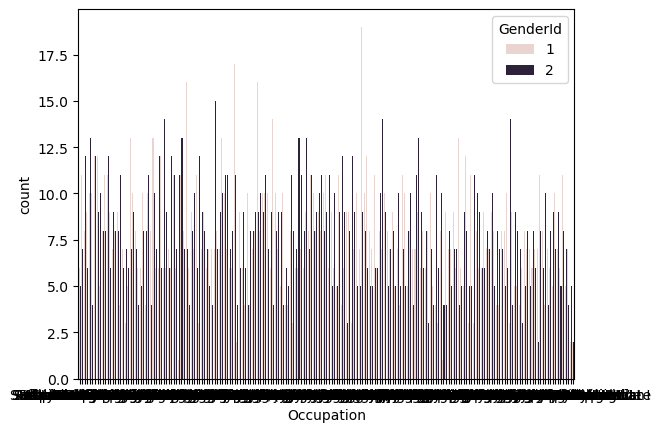

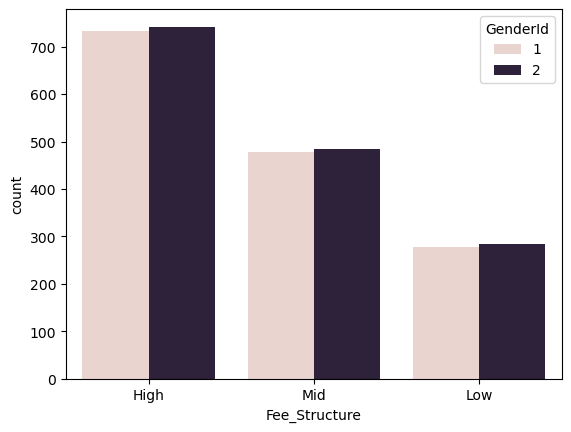

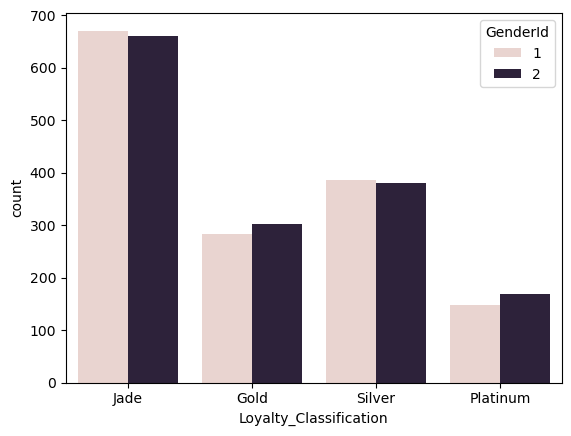

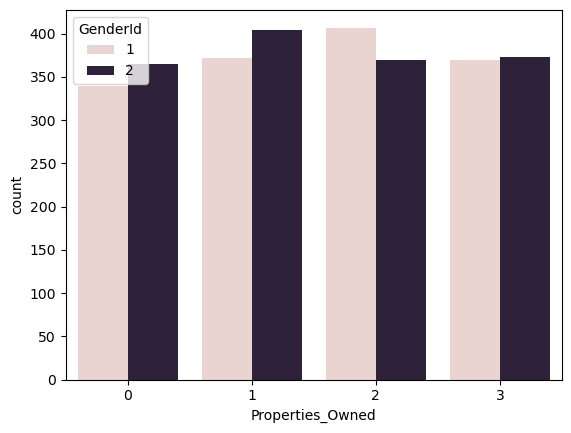

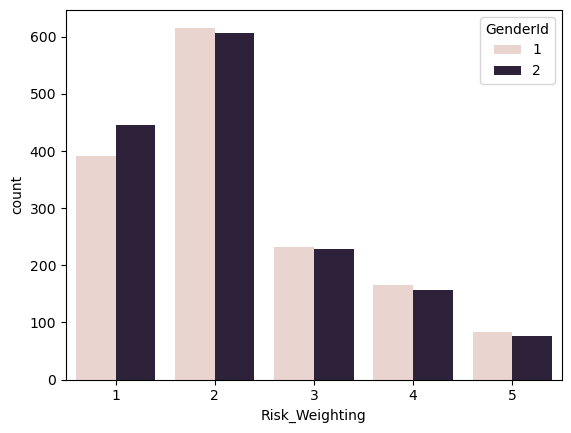

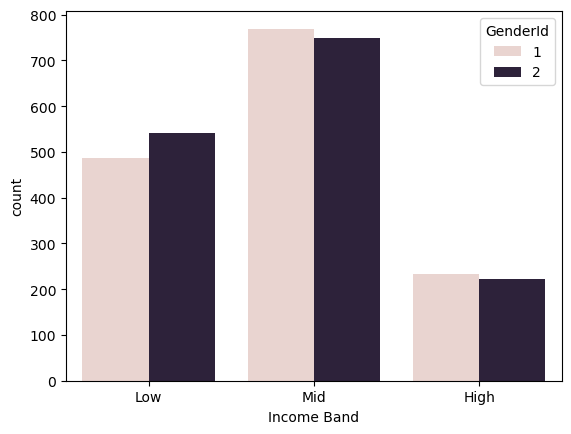

In [81]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount_of_Credit_Cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income Band"]]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='GenderId')

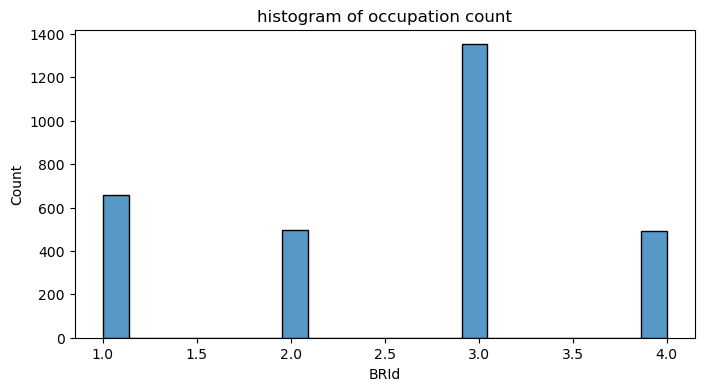

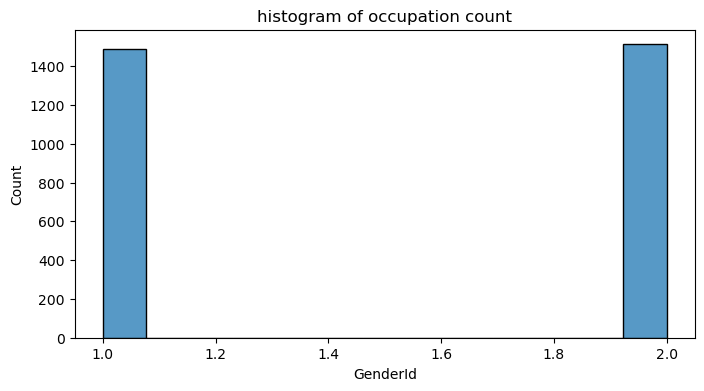

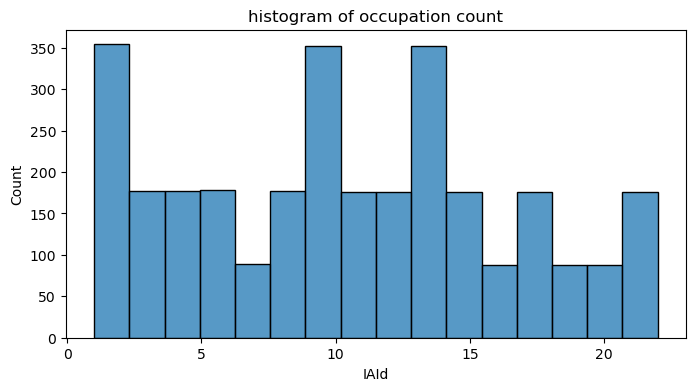

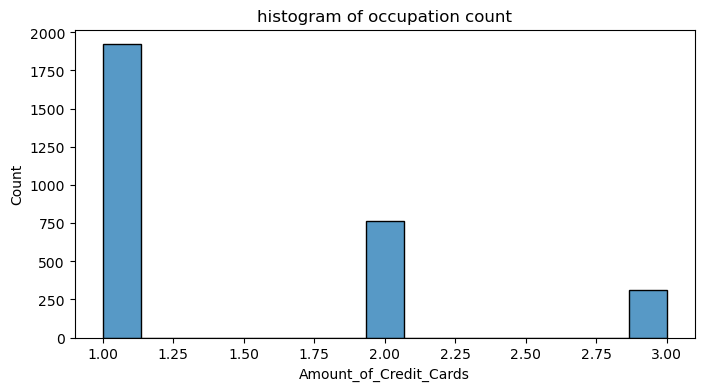

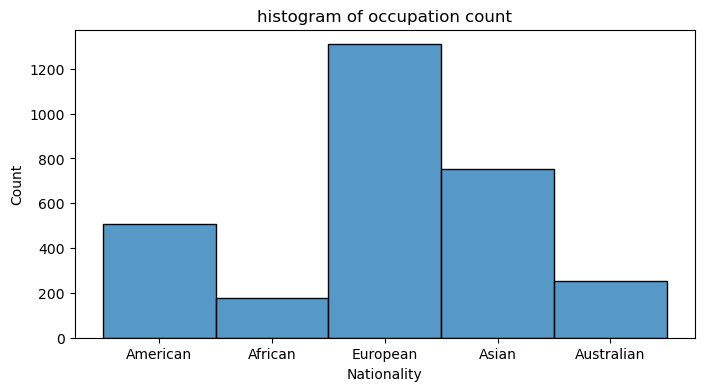

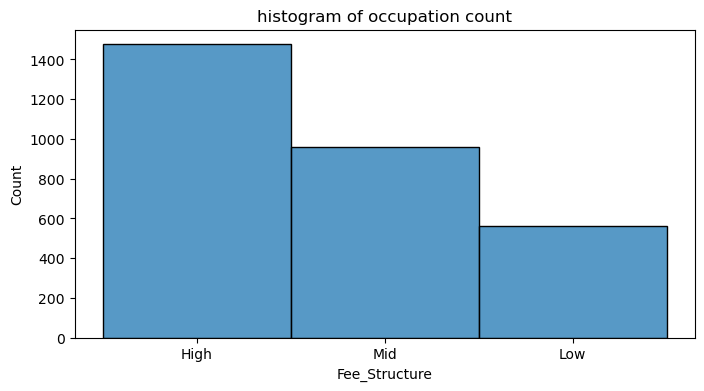

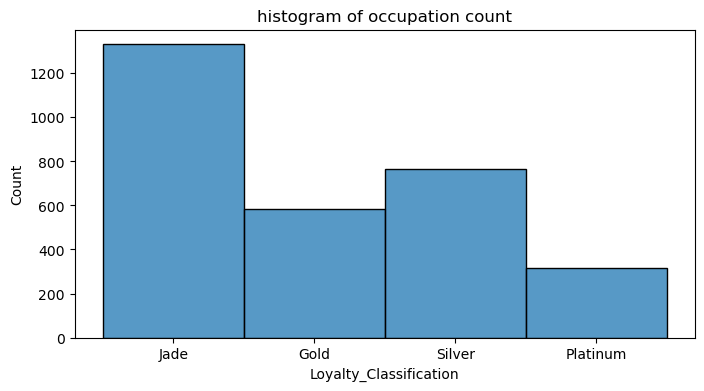

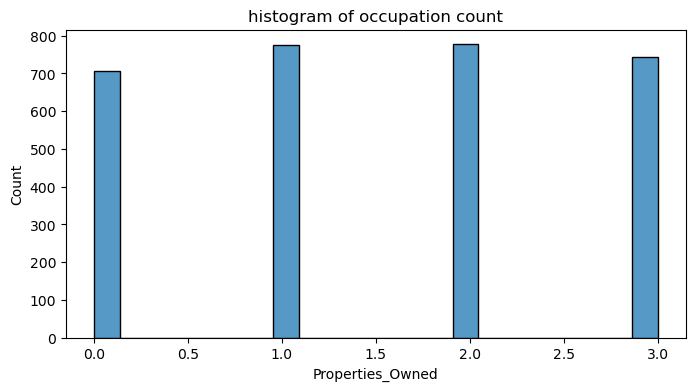

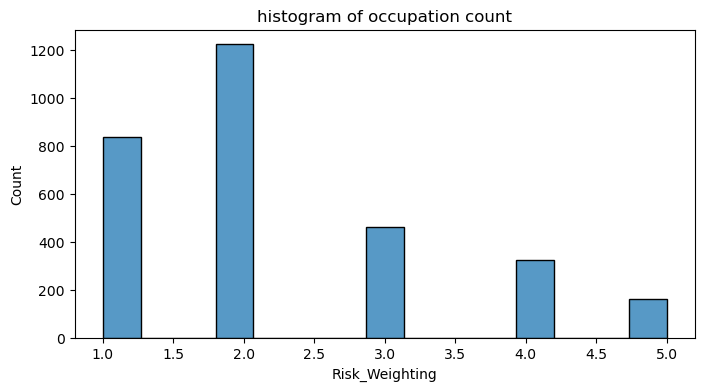

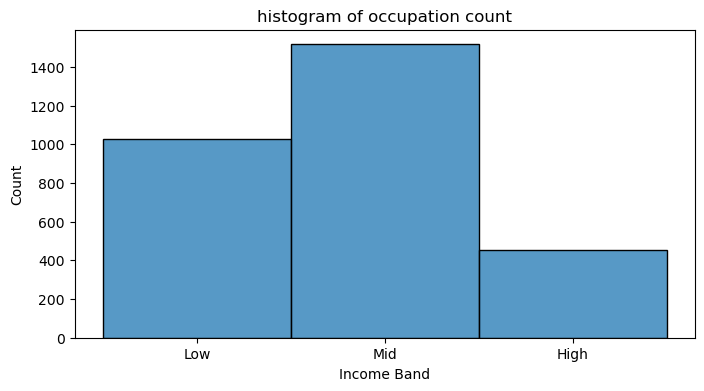

In [89]:
for col in categorical_cols:
    if col == "Occupation":
        continue
        
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title("histogram of occupation count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

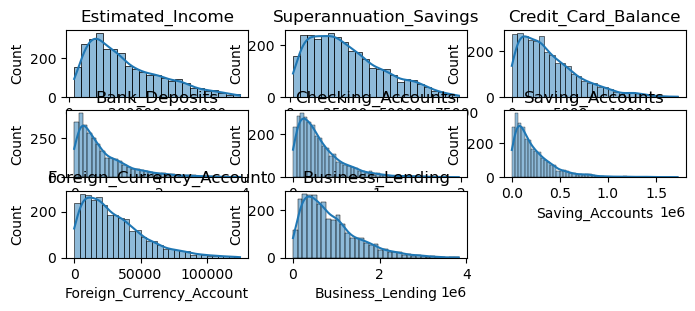

In [101]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending']

plt.figure(figsize=(8,4))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show

Text(0.5, 1.0, 'Corelation matrix')

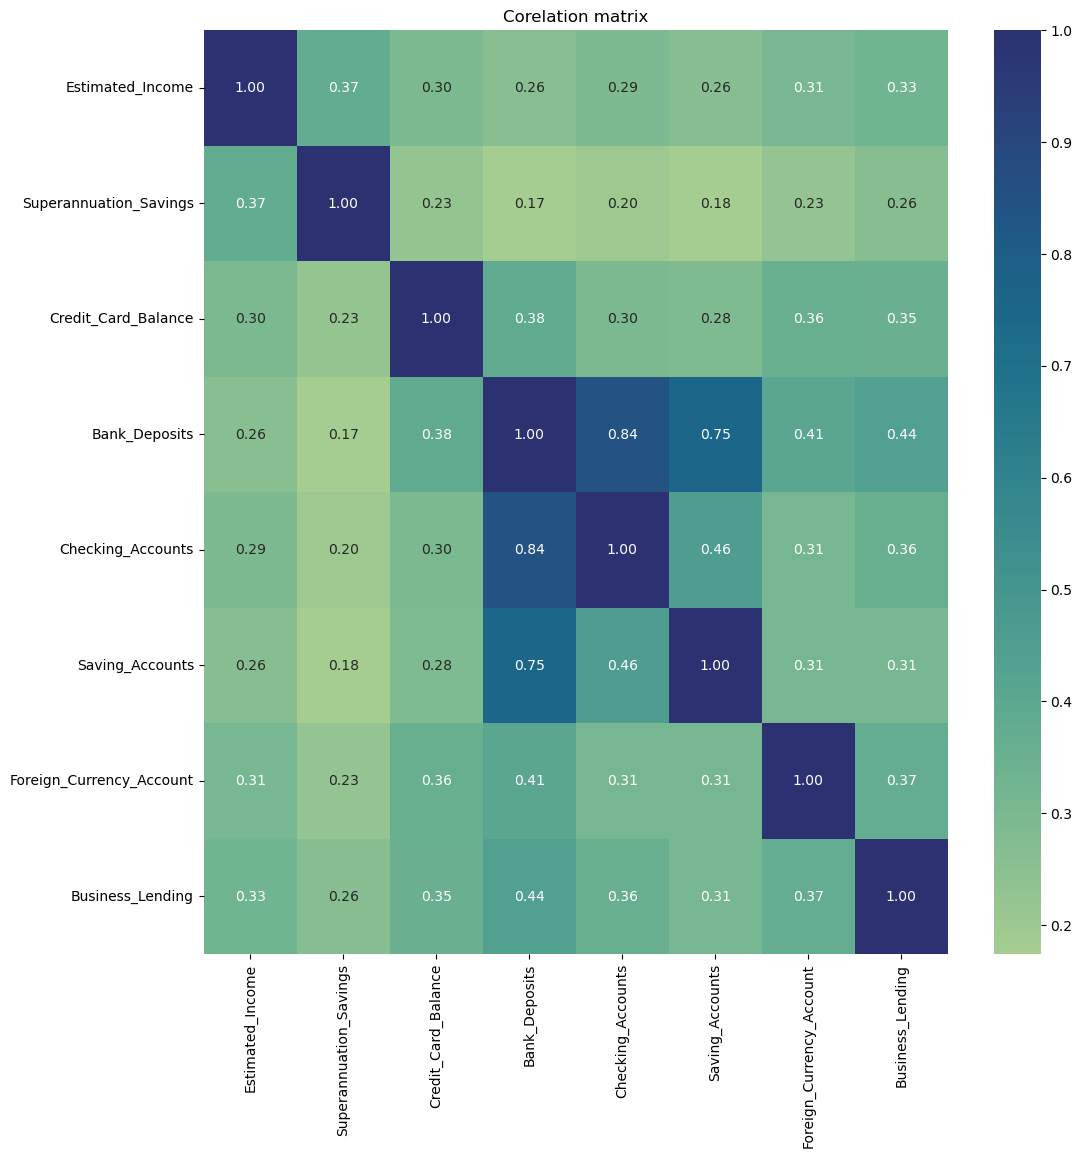

In [105]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Corelation matrix')

In [107]:
#Insights of EDA

#High Correlation Between Bank Deposits and Checking/Savings Accounts
#Insight:
#This likely indicates that customers who maintain checking or savings accounts also hold significant bank deposits, suggesting these accounts act as foundational products in customer relationships.
#It Means:
#Customers are not using these accounts in isolation.
#There may be bundled offerings, or these accounts are prerequisites for deposits.
#Strong candidates for cross-sell analysis or product affinity modeling.

